In [2]:
!pip install arabic-reshaper python-bidi

In [3]:
!pip install xgboost lightgbm catboost

# Import The Used Libraries 

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import re
import plotly.express as px
import random
from nltk.corpus import stopwords
import nltk
from collections import Counter
import arabic_reshaper
from bidi.algorithm import get_display
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report ,confusion_matrix ,ConfusionMatrixDisplay
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import pickle
from tensorflow.keras.models import load_model

%matplotlib inline

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

## 🧰 Libraries & Tools Used

This notebook utilizes a combination of libraries for **data manipulation**, **natural language processing**, **visualization**, and **machine learning** to perform sentiment analysis on Arabic reviews. Here's a breakdown of their roles:

### 📊 Data Handling & Preprocessing
- **`pandas`**: For loading, cleaning, and manipulating structured data.
- **`numpy`**: Supports numerical operations and array processing.
- **`re`**: Regular expressions used for cleaning and normalizing text.
- **`random`**: Generates random colors for visualization aesthetics.

### 🗣️ Natural Language Processing
- **`nltk`**: Used for Arabic stopword removal and basic text processing.
- **`stopwords`**: Arabic stopword list from NLTK.
- **`Counter`**: Helps in counting word frequencies in tokenized text.

### 🧠 Feature Extraction
- **`TfidfVectorizer`**: Converts textual reviews into numerical vectors based on Term Frequency-Inverse Document Frequency, which reflects word importance.

### 🌍 Arabic Text Rendering
- **`arabic_reshaper`**: Corrects Arabic text for proper display (reshapes characters to be connected).
- **`bidi.algorithm.get_display`**: Reorders reshaped text for right-to-left (RTL) display in visualizations.

### 📈 Visualization
- **`matplotlib.pyplot`**: Core visualization library for plotting graphs.
- **`seaborn`**: Enhances `matplotlib` with better aesthetics for statistical plots.
- **`plotly.express`**: Interactive and dynamic plotting for exploratory data analysis.
- **`ConfusionMatrixDisplay`**: Visual tool from `sklearn` to display confusion matrices.

### 🔍 Model Training & Evaluation
- **`train_test_split`**: Splits dataset into training and testing sets.
- **`LabelEncoder`**: Converts categorical sentiment labels into numeric format.

### 🤖 Machine Learning Models
- **`MultinomialNB`**: A fast, probabilistic classifier suitable for discrete features like TF-IDF.
- **`LogisticRegression`**: Linear model for binary and multi-class classification.
- **`LinearSVC`**: Support Vector Machine for efficient linear classification.
- **`RandomForestClassifier`**: Ensemble model using decision trees for robust predictions.
- **`XGBClassifier`**: High-performance gradient boosting from XGBoost.
- **`LGBMClassifier`**: Lightweight gradient boosting library optimized for speed and accuracy.
- **`CatBoostClassifier`**: Gradient boosting library that handles categorical features well and requires minimal preprocessing.

### 📌 Additional
- **`%matplotlib inline`**: Jupyter magic command to render plots directly inside notebook cells.

These libraries collectively form a complete pipeline for text classification, from preprocessing raw Arabic text to building and evaluating powerful machine learning models.


# Random Colours Generation

In [5]:
def random_colours(number_of_colors):
    '''
    Simple function for random colours generation.
    Input:
        number_of_colors - integer value indicating the number of colours which are going to be generated.
    Output:
        Color in the following format: ['#E86DA4'] .
    '''
    colors = []
    for i in range(number_of_colors):
        colors.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors

# Read The Dataset

In [69]:
df=pd.read_csv('/kaggle/input/egyptian-arabic-reviews-dataset/Egyptian Reviews Dataset.csv')

# show the first 5 rows

In [70]:
df.head()

,Text,Sentiment
0,فعلاً التطبيق محتاج تحديث بسيط. ، وانصح الناس ...,neutral
1,بصراحة المكان مش وحش بس مش الأفضل. ، وده رأيي ...,neutral
2,من الآخر الخدمة كانت ممتازة جدًا والناس هناك م...,positive
3,بمنتهى الصراحة التجربة كانت عادية، لا وحشة ولا...,neutral
4,بكل أمانة المنتج طلع بايظ ومش راضيين يرجعوه. ،...,negative


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

# Arabic Sentiment Analysis – Understanding User Reviews in Arabic

## 📌 Project Overview

In this project, we focus on **Arabic Sentiment Analysis** by building a machine learning pipeline that classifies Arabic user reviews into three sentiment categories: **Positive**, **Negative**, and **Neutral**. The dataset is collected from various mobile applications and reflects real-world feedback from Arabic-speaking users.

---

## 🌍 Why This Project Matters

Despite the growth of Natural Language Processing (NLP) globally, **Arabic remains an underrepresented language** in data-driven AI applications. Arabic poses unique challenges including:

- Complex and rich morphology.
- Dialectal diversity across regions.
- Scarcity of high-quality labeled datasets.

By addressing these challenges, this project aims to contribute to the **advancement of Arabic NLP**, making tools more inclusive and accessible for the Arab world.

---

## 🎯 Goals & Vision

- 🧼 **Preprocess Arabic text**: Normalize, clean, and tokenize using Arabic-specific techniques.
- 🧠 **Extract features** from reviews using TF-IDF (Term Frequency-Inverse Document Frequency).
- 🤖 **Train machine learning models** to automatically classify sentiment.
- 📊 **Visualize results** with properly rendered Arabic text.
- 🚀 **Build a reliable sentiment classifier** that can be deployed in real-world Arabic applications such as:
  - Customer feedback monitoring
  - App store review analytics
  - Market sentiment tracking

This project envisions a future where **Arabic users' voices are accurately understood** and automatically processed by modern AI systems.

---

## 📂 Dataset Description

- **File Name**: `Final_Data.csv`
- **Total Rows**: 40,046
- **Columns**:
  - `review_description` – Arabic text of the user review.
  - `rating` – Sentiment label: `'positive'`, `'negative'`, or `'neutral'`.
  - `company` – App or service name (used for context, but not in modeling).

---

## ✅ Conclusion

This project demonstrates that with proper preprocessing and feature extraction, it's possible to build an effective Arabic sentiment classifier. It sets the foundation for future work in:

- **Arabic social media monitoring**
- **Customer review mining**
- **Cross-lingual sentiment tools**

By focusing on Arabic, this notebook contributes to a more inclusive and linguistically diverse AI ecosystem.

---

*Developed with care to support Arabic AI applications and make Arabic voices heard in the digital world.*

# Drop unneeded column

In [8]:
df.drop('company',axis=1,inplace=True)

In [9]:
df

,review_description,rating
0,رائع,positive
1,برنامج رائع جدا يساعد على تلبيه الاحتياجات بشك...,positive
2,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...,negative
3,لماذا لا يمكننا طلب من ماكدونالدز؟,negative
4,البرنامج بيظهر كل المطاعم و مغلقه مع انها بتكو...,negative
...,...,...
40041,تجربه جيده بس ينقصها عدم اهتمام خدمة العملاء ب...,neutral
40042,انا ساكنة بمنطقة الكينج ولا توجد عربيات قبل ال...,negative
40043,جيد ولكن لماذا لا توجد خطوط كثيره من المريوطيه...,neutral
40044,جيدا جدا ...ولكن الاسعار عاليه جدا\n,neutral


# Checking for missing value

In [71]:
df.isna().sum()

Text         0
Sentiment    0
dtype: int64

In [11]:
df.dropna(inplace=True)

# Rename columns

In [12]:
df.rename({'review_description':'text','rating':'sentiment'},axis=1,inplace=True)

In [13]:
df.sample(5)

,text,sentiment
6298,يا ريت أنصاف كباتن طلبات وإعطائهم كامل حقوقهم,negative
18093,اطلق تطبيق,positive
33858,السواق مشى قبل المعاد بحوالي ١٠ او ٧ دقائق وقا...,negative
27748,يستحق التحميل,positive
3907,ليش مافي على طلبات مكاتب و محلات عشرين قرش من ...,neutral


# Check for duplicated Value

In [72]:
df.duplicated().sum()

0

In [15]:
df.drop_duplicates()

,text,sentiment
0,رائع,positive
1,برنامج رائع جدا يساعد على تلبيه الاحتياجات بشك...,positive
2,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...,negative
3,لماذا لا يمكننا طلب من ماكدونالدز؟,negative
4,البرنامج بيظهر كل المطاعم و مغلقه مع انها بتكو...,negative
...,...,...
40041,تجربه جيده بس ينقصها عدم اهتمام خدمة العملاء ب...,neutral
40042,انا ساكنة بمنطقة الكينج ولا توجد عربيات قبل ال...,negative
40043,جيد ولكن لماذا لا توجد خطوط كثيره من المريوطيه...,neutral
40044,جيدا جدا ...ولكن الاسعار عاليه جدا\n,neutral


In [16]:
df.reset_index(inplace=True)

In [17]:
df.drop('index',axis=1,inplace=True)

In [18]:
df.duplicated().sum()

941

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40045 entries, 0 to 40044
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       40045 non-null  object
 1   sentiment  40045 non-null  object
dtypes: object(2)
memory usage: 625.8+ KB


In [20]:
df['sentiment'].value_counts()

sentiment
positive    23921
negative    14199
neutral      1925
Name: count, dtype: int64

# Represent the Types of Sentiment

<Axes: xlabel='Sentiment', ylabel='count'>

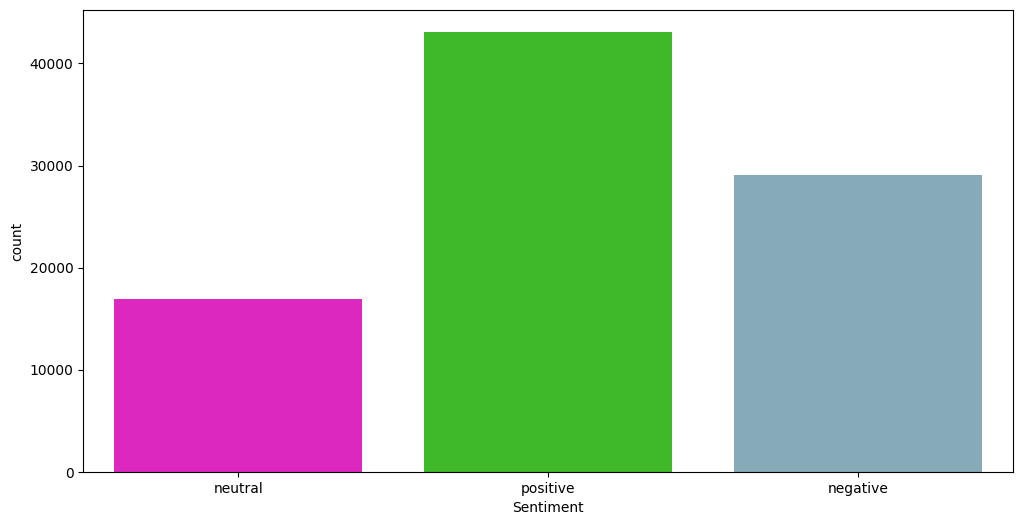

In [77]:
plt.figure(figsize=(12,6))
sns.countplot(x='Sentiment',data=df,palette=random_colours(3))

In [79]:
for i in range(20):
    print(df['Text'][i])

فعلاً التطبيق محتاج تحديث بسيط. ، وانصح الناس تجرب. (#2a92a2ea)
بصراحة المكان مش وحش بس مش الأفضل. ، وده رأيي الشخصي. (#b17ece17)
من الآخر الخدمة كانت ممتازة جدًا والناس هناك محترمين أوي. ، وده رأيي الشخصي. (#8ec61070)
بمنتهى الصراحة التجربة كانت عادية، لا وحشة ولا ممتازة. ، ودي كانت تجربة حلوة. (#2bfa9e5f)
بكل أمانة المنتج طلع بايظ ومش راضيين يرجعوه. ، ونفسي أكررها. (#4314fcda)
أنا شايف إن تجربة جميلة وهكررها أكيد. ، وده اللي حصل معايا. (#361fc49c)
بكل أمانة المكان كويس بس مفيش حاجة مميزة. ، وهجربهم تاني. (#9fd4cb78)
للأمانة السعر غالي جدًا على اللي باخده. ، بس ده رأيي. (#40bf7d35)
بكل أمانة الناس هناك نص ونص. ، وانصح الناس تجرب. (#9f023e13)
بمنتهى الصراحة الخدمة كانت وحشة جدًا ومحدش رد عليا. ، بس ده رأيي. (#4b3bfad4)
والله خدمة العملاء وحشة ومفيش ردود. ، بس ده رأيي. (#708ab625)
يعني المكان كويس بس مفيش حاجة مميزة. ، وانصح الناس تجرب. (#07ac0348)
يعني التطبيق شغال كويس جدًا وسهل في الاستخدام. ، وده رأيي الشخصي. (#c6fd80e8)
للأمانة المنتج طلع بايظ ومش راضيين يرجعوه. ، وده اللي حصل معاي

## Define the Stopwords

In [80]:
# قائمة كلمات الوقف من NLTK
arabic_stopwords_nltk = set(stopwords.words('arabic'))
# كلمات النفي التي لا يجب حذفها
negation_words = {'لا', 'ما', 'ليس', 'لم', 'لن', 'بدون', 'غير', 'مو', 'مش'}
# إزالة كلمات النفي من قائمة الوقف
arabic_stopwords = arabic_stopwords_nltk - negation_words

# Text Preprocessing

In [81]:
def text_arabic_preprocessing(text):
    text = str(text)

    # 1. Normalize Arabic letters
    text = re.sub(r'[إأآا]', 'ا', text)
    text = re.sub(r'ى', 'ي', text)
    text = re.sub(r'ؤ', 'ء', text)
    text = re.sub(r'ئ', 'ء', text)
    text = re.sub(r'ة', 'ه', text)

    # 2. Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)

    # 3. Remove punctuation and symbols
    text = re.sub(r'[^\u0600-\u06FF\s]', ' ', text)

    # 4. Remove numbers
    text = re.sub(r'\d+', '', text)

    # 5. Remove diacritics
    text = re.sub(r'[\u0617-\u061A\u064B-\u0652]', '', text)

    # 6. Remove repeated characters
    text = re.sub(r'(.)\1{2,}', r'\1', text)

    # 7. Normalize spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # 8. Tokenize & remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in arabic_stopwords]

    return ' '.join(tokens)

In [83]:
df['clean_text'] = df['Text'].apply(text_arabic_preprocessing)

# Check the sentences after Preprocessing

In [85]:
for i in range(10):
    print(f"\n🔸 Original: {df['Text'][i]}")
    print(f"✅ Cleaned : {df['clean_text'][i]}")


🔸 Original: فعلاً التطبيق محتاج تحديث بسيط. ، وانصح الناس تجرب. (#2a92a2ea)
✅ Cleaned : فعلا التطبيق محتاج تحديث بسيط ، وانصح الناس تجرب

🔸 Original: بصراحة المكان مش وحش بس مش الأفضل. ، وده رأيي الشخصي. (#b17ece17)
✅ Cleaned : بصراحه المكان مش وحش مش الافضل ، وده رايي الشخصي

🔸 Original: من الآخر الخدمة كانت ممتازة جدًا والناس هناك محترمين أوي. ، وده رأيي الشخصي. (#8ec61070)
✅ Cleaned : الاخر الخدمه كانت ممتازه جدا والناس محترمين اوي ، وده رايي الشخصي

🔸 Original: بمنتهى الصراحة التجربة كانت عادية، لا وحشة ولا ممتازة. ، ودي كانت تجربة حلوة. (#2bfa9e5f)
✅ Cleaned : بمنتهي الصراحه التجربه كانت عاديه، لا وحشه ممتازه ، ودي كانت تجربه حلوه

🔸 Original: بكل أمانة المنتج طلع بايظ ومش راضيين يرجعوه. ، ونفسي أكررها. (#4314fcda)
✅ Cleaned : بكل امانه المنتج طلع بايظ ومش راضيين يرجعوه ، ونفسي اكررها

🔸 Original: أنا شايف إن تجربة جميلة وهكررها أكيد. ، وده اللي حصل معايا. (#361fc49c)
✅ Cleaned : انا شايف ان تجربه جميله وهكررها اكيد ، وده اللي حصل معايا

🔸 Original: بكل أمانة المكان كويس بس مفيش 

# Represent the Common Words in Reviews

In [27]:
df['temp_list'] = df['text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,من,6905
1,جدا,6115
2,في,5581
3,و,4182
4,تطبيق,3827
5,التطبيق,3138
6,ما,2885
7,لا,2652
8,ممتاز,2594
9,بس,2419


In [28]:

all_words = ' '.join(df['text']).split()
word_freq = Counter(all_words)

# Prepare data for visualization
most_common_words = word_freq.most_common(20)
words, freqs = zip(*most_common_words)

# Prepare reshaped and bidi-corrected words for plotting
reshaped_words = [get_display(arabic_reshaper.reshape(word)) for word in words]

fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Reviews', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [29]:
Positive_sent = df[df['sentiment']=='positive']
Negative_sent = df[df['sentiment']=='negative']
Neutral_sent = df[df['sentiment']=='neutral']

# Represent the Common Positive Words

In [30]:
top = Counter([item for sublist in Positive_sent['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,جدا,3733
1,من,2759
2,في,2481
3,ممتاز,2436
4,تطبيق,2163
5,و,1735
6,جميل,1577
7,رائع,1485
8,بس,1481
9,برنامج,1379


In [31]:
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Positive Words', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

# Represent the Common Negative Words

In [32]:
top = Counter([item for sublist in Negative_sent['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

,Common_words,count
1,في,2667
2,جدا,2270
3,و,2216
4,لا,1984
5,ما,1883
6,التطبيق,1681
7,تطبيق,1595
8,مش,1539
9,الطلب,1385
10,ولا,1314


In [33]:
fig = px.treemap(temp_negative, path=['Common_words'], values='count',title='Tree Of Most Common Negative Words')
fig.show()

# Represent the Common Neutral Words

In [34]:
top = Counter([item for sublist in Neutral_sent['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Oranges')

,Common_words,count
1,من,388
2,بس,259
3,و,231
4,المطاعم,192
5,لا,176
6,الطلب,171
7,ما,171
8,التطبيق,161
9,البرنامج,142
10,مش,139


In [35]:
fig = px.bar(temp_neutral, x="count", y="Common_words", title='Most Commmon Neutral Words', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [36]:
df['temp_list'] = df['clean_text'].apply(lambda x:str(x).split())

In [37]:
raw_text = [word for word_list in df['temp_list'] for word in word_list]

# Create Function to calculate the Unique Words

In [38]:
def words_unique(sentiment, numwords, raw_words):
    '''
    Input:
        sentiment - نوع المشاعر (مثال: 'positive', 'negative', 'neutral')
        numwords - عدد الكلمات الفريدة التي تريد عرضها
        raw_words - قائمة بكل الكلمات (raw_text)
    Output:
        DataFrame يحتوي على الكلمات الفريدة لهذا النوع وعدد تكرارها (مرتب تنازلياً)
    '''
    allother = []
    for item in df[df['sentiment'] != sentiment]['temp_list']:
        for word in item:
            allother.append(word)
    allother = list(set(allother))

    specificnonly = [x for x in raw_words if x not in allother]

    mycounter = Counter()
    for item in df[df['sentiment'] == sentiment]['temp_list']:
        for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)
    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]

    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns=['words', 'count'])
    return Unique_words

# Represent the Unique Positive Words

In [39]:
Unique_Positive= words_unique('positive', 20, raw_text)
print("The top 20 unique words in Positive Reviews are:")
Unique_Positive.style.background_gradient(cmap='Greens')

The top 20 unique words in Positive Reviews are:


,words,count
0,متاز,62
1,الروعه,45
2,نايس,29
3,كفو,26
4,جبار,26
5,منتاز,26
6,استمرو,26
7,ويستحق,25
8,اسطوري,24
9,وممتازه,22


In [40]:
fig = px.treemap(Unique_Positive, path=['words'], values='count',title='Tree Of Unique Positive Words')
fig.show()

# Represent the Unique Negative Words

In [41]:
Unique_Negative= words_unique('negative', 10, raw_text)
print("The top 10 unique words in Negative Tweets are:")
Unique_Negative.style.background_gradient(cmap='Reds')

The top 10 unique words in Negative Tweets are:


,words,count
0,اوسخ,52
1,اسواء,51
2,ازبل,45
3,وسخه,40
4,خساره,37
5,الحذف,35
6,مقاطعه,26
7,اضراب,25
8,رفض,23
9,القرف,23


In [42]:
fig = px.treemap(Unique_Negative, path=['words'], values='count',title='Tree Of Unique Negative Words')
fig.show()

# Represent the Unique Neutral Words

In [43]:
Unique_Neutral= words_unique('neutral', 10, raw_text)
print("The top 10 unique words in Neutral Tweets are:")
Unique_Neutral.style.background_gradient(cmap='Oranges')

The top 10 unique words in Neutral Tweets are:


,words,count
0,انجلش,4
1,هرن,3
2,حسيتو,2
3,تشكين,2
4,ممله,2
5,محفظات,2
6,وتنتهي,2
7,الملاحظ,2
8,بدوس,2
9,احدي,2


In [44]:
fig = px.treemap(Unique_Neutral, path=['words'], values='count',title='Tree Of Unique Neutral Words')
fig.show()

# Using TF-IDF Vectorization

In [45]:
# إنشاء TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=1000)

# تحويل النص النظيف إلى مصفوفة TF-IDF
X_tfidf = vectorizer.fit_transform(df['clean_text'])

# تحويل المصفوفة إلى DataFrame لسهولة العرض
import pandas as pd
feature_names = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)

# عرض شكل البيانات وعينة منها
print("شكل مصفوفة TF-IDF:", tfidf_df.shape)
display(tfidf_df.head())

شكل مصفوفة TF-IDF: (40045, 1000)


,ابدا,ابلكيشن,ابن,ابو,ابي,اتصال,اتصل,اتصلت,اتعامل,اتمنا,...,ينفع,ينقصه,يوجد,يوصل,يوصلك,يوصلون,يوفر,يوفقكم,يوم,يومين
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.374235,0.0,0.0,0.0,0.0,...,0.0,0.0,0.264136,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
X = tfidf_df
y = df['sentiment']

# Split Train and Test Data

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Logistic Regression Model

In [48]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [49]:
y_pred_logis = model.predict(X_test)

# Calculate the Accuracy

In [50]:
acc_logreg = accuracy_score(y_test, y_pred_logis)
print("accuracy of Logistic Regression:", acc_logreg)

accuracy of Logistic Regression: 0.8233237607691347


In [51]:
print(classification_report(y_test, y_pred_logis))
print(confusion_matrix(y_test, y_pred_logis))

              precision    recall  f1-score   support

    negative       0.80      0.78      0.79      2832
     neutral       0.31      0.01      0.02       405
    positive       0.84      0.92      0.88      4772

    accuracy                           0.82      8009
   macro avg       0.65      0.57      0.56      8009
weighted avg       0.80      0.82      0.80      8009

[[2195    5  632]
 [ 164    5  236]
 [ 372    6 4394]]


# Create Confusion Matrix

<Figure size 800x400 with 0 Axes>

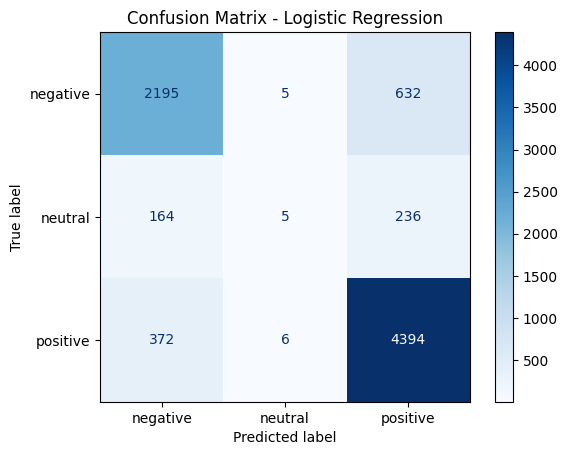

In [52]:
plt.figure(figsize=(8,4))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_logis), display_labels=model.classes_).plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Build Naive Bayes Model

In [53]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)


MultinomialNB()

In [54]:
# التنبؤ على بيانات الاختبار
y_pred_naive = nb_model.predict(X_test)

In [55]:
acc_naive = accuracy_score(y_test, y_pred_naive)
print("accuracy of Naive Bayes:", acc_naive)

accuracy of Naive Bayes: 0.8144587339243351


In [56]:
print(classification_report(y_test, y_pred_naive))
print(confusion_matrix(y_test, y_pred_naive))

              precision    recall  f1-score   support

    negative       0.78      0.77      0.78      2832
     neutral       0.25      0.00      0.00       405
    positive       0.83      0.91      0.87      4772

    accuracy                           0.81      8009
   macro avg       0.62      0.56      0.55      8009
weighted avg       0.79      0.81      0.79      8009

[[2171    1  660]
 [ 177    1  227]
 [ 419    2 4351]]


# Create Confusion Matrix For Naive Bayes

<Figure size 800x400 with 0 Axes>

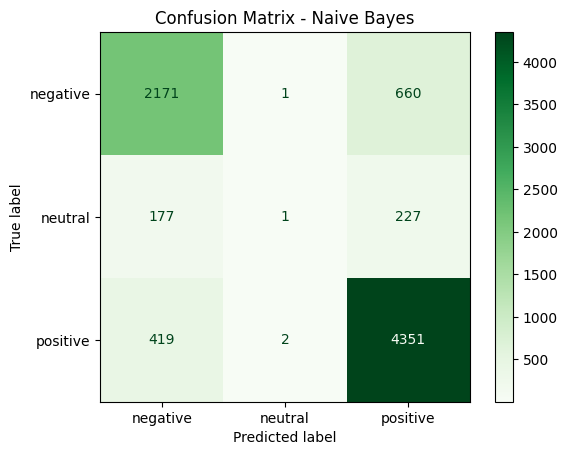

In [57]:
plt.figure(figsize=(8,4))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_naive), display_labels=nb_model.classes_).plot(cmap='Greens', values_format='d')
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

# Build SVM Model

In [58]:
svm = LinearSVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [59]:
acc_svm = accuracy_score(y_test, y_pred_svm)
print("accuracy of Naive Bayes:", acc_svm)

accuracy of Naive Bayes: 0.8208265701086278


In [60]:
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))

              precision    recall  f1-score   support

    negative       0.80      0.77      0.78      2832
     neutral       0.14      0.00      0.00       405
    positive       0.83      0.92      0.87      4772

    accuracy                           0.82      8009
   macro avg       0.59      0.56      0.55      8009
weighted avg       0.79      0.82      0.80      8009

[[2180    2  650]
 [ 169    1  235]
 [ 375    4 4393]]


# Create Confusion Matrix for SVM

<Figure size 800x400 with 0 Axes>

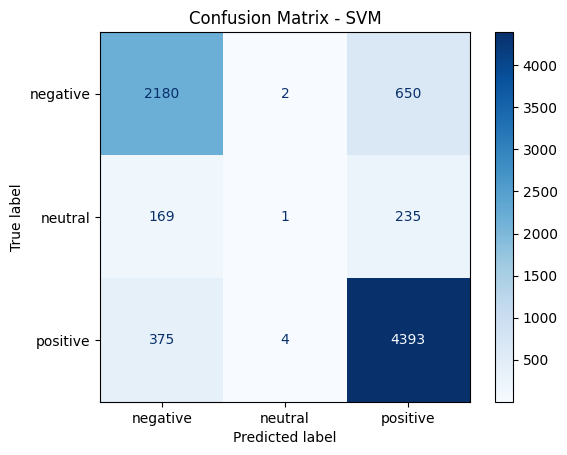

In [61]:
plt.figure(figsize=(8,4))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_svm), display_labels=svm.classes_).plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - SVM")
plt.show()

# Build Random Forest Model

In [62]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

KeyboardInterrupt: 

In [ ]:
acc_rf = accuracy_score(y_test, y_pred_rf)
print("accuracy of Random Forest:", acc_rf)

In [ ]:
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

# Create Confusion Matrix for Random Forest

In [ ]:
plt.figure(figsize=(8,4))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf), display_labels=rf.classes_).plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Build LightGBM Model

In [ ]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

In [ ]:
acc_lgbm = accuracy_score(y_test, y_pred_lgbm)
print("accuracy of LightGBM:", acc_lgbm)

In [ ]:
print(classification_report(y_test, y_pred_lgbm))
print(confusion_matrix(y_test, y_pred_lgbm))

# Create Confusion Matrix for LightGBM

In [ ]:
plt.figure(figsize=(8,4))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_lgbm), display_labels=lgbm.classes_).plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - LightGBM")
plt.show()

# Build CatBoost Model

In [ ]:
cat = CatBoostClassifier(verbose=0)
cat.fit(X_train, y_train)
y_pred_cat = cat.predict(X_test)

In [ ]:
acc_cat = accuracy_score(y_test, y_pred_cat)
print("accuracy of CatBoost:", acc_cat)

In [ ]:
print(classification_report(y_test, y_pred_cat))
print(confusion_matrix(y_test, y_pred_cat))

# Create Confusion Matrix for CatBoost

In [ ]:
plt.figure(figsize=(8,4))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_cat), display_labels=cat.classes_).plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - CatBoost")
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

## 🤖 Model Comparison & Evaluation

To determine the most effective algorithm for Arabic sentiment classification, several machine learning models were trained and evaluated on the same preprocessed dataset using TF-IDF features.

Each model was tested using the same train/test split to ensure fairness and consistency. Below is a summary of their performance based on **accuracy**:

### 📊 Accuracy Results

| Model                | Accuracy Score |
|---------------------|----------------|
| **Logistic Regression** | `0.8233` |
| **Naive Bayes**          | `0.8145` |
| **Support Vector Machine (SVM)** | `0.8208` |
| **Random Forest**        | `0.8153` |
| **LightGBM**             | `0.8217` |
| **CatBoost**             | `0.8181` |

### 📌 Observations

- ✅ **Logistic Regression** achieved the highest accuracy (`82.33%`), making it a strong baseline model for this task.
- 🌟 **LightGBM** and **SVM** also performed competitively, suggesting that both linear and gradient boosting methods are suitable for high-dimensional TF-IDF vectors.
- 📉 **Naive Bayes**, while slightly lower in accuracy, is still a valuable model due to its **simplicity and speed**—especially in production scenarios.
- 🌳 **Random Forest** and **CatBoost** provided stable results, with CatBoost showing strong generalization without requiring extensive preprocessing.

### ⚙️ Final Thoughts

While Logistic Regression slightly outperformed the others, all models demonstrated solid performance above 81% accuracy, proving that **Arabic text classification is feasible with traditional ML models** when proper preprocessing and feature engineering are applied.

In future iterations, combining these models in an **ensemble** or exploring **deep learning architectures** (e.g., BERT for Arabic) could further enhance accuracy and robustness.


In [90]:
label_map = {'positive': 0, 'neutral': 1, 'negative': 2}
df['label'] = df['Sentiment'].str.strip().str.lower().map(label_map)

In [91]:
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['Text'])
sequences = tokenizer.texts_to_sequences(df['Text'])
padded_sequences = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

In [92]:
X = padded_sequences
y = np.array(df['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
KerasModel = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=100),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.



In [94]:
KerasModel.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [95]:
history = KerasModel.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=1024,
    verbose=1,
    callbacks=[
        EarlyStopping(
            patience=10,
            monitor='val_accuracy',
            restore_best_weights=True
        )
    ]
)

Epoch 1/100


I0000 00:00:1750627766.744215     128 service.cc:148] XLA service 0x7e6bdc0030a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750627766.744722     128 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1750627767.044052     128 cuda_dnn.cc:529] Loaded cuDNN version 90300


23/70 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4642 - loss: 1.0489

I0000 00:00:1750627768.334207     128 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.4759 - loss: 1.0363 - val_accuracy: 0.4854 - val_loss: 0.9883
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5294 - loss: 0.9481 - val_accuracy: 0.7177 - val_loss: 0.7129
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7922 - loss: 0.6379 - val_accuracy: 0.8800 - val_loss: 0.3889
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8689 - loss: 0.4069 - val_accuracy: 0.8953 - val_loss: 0.3058
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8865 - loss: 0.3276 - val_accuracy: 0.9048 - val_loss: 0.2712
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9027 - loss: 0.2891 - val_accuracy: 0.9114 - val_loss: 0.2577
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9096 - loss: 0.2680 - val_accuracy: 0.9173 - val_loss: 0.2520
Epoch 8/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9166 - loss: 0.2526 - val_accuracy: 0.9153 - val_loss: 0.

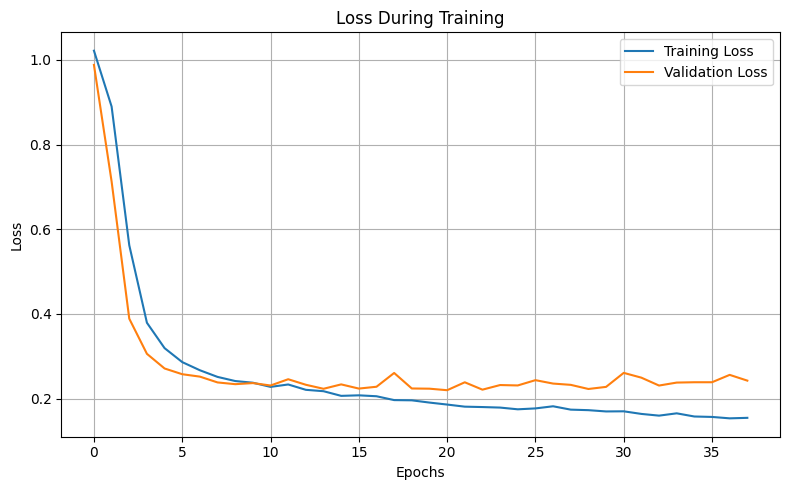

In [96]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [97]:
def predict_review(text):
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=100, padding='post', truncating='post')
    pred = KerasModel.predict(padded)
    class_idx = np.argmax(pred, axis=1)[0]
    class_names = {0: 'positive', 1: 'neutral', 2: 'negative'}
    return class_names[class_idx], float(np.max(pred))

In [100]:
example = "ده اخر تعامل مبينا"
sentiment, confidence = predict_review(example)
print(f"Predicted Sentiment: {sentiment} (Confidence: {confidence:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Sentiment: negative (Confidence: 0.87)


In [101]:
y_pred_probs = KerasModel.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


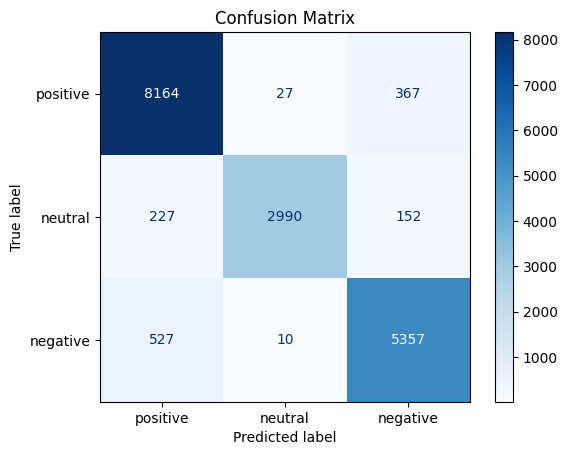

In [102]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['positive', 'neutral', 'negative'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

In [103]:
report = classification_report(y_test, y_pred, target_names=['positive', 'neutral', 'negative'])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

    positive       0.92      0.95      0.93      8558
     neutral       0.99      0.89      0.93      3369
    negative       0.91      0.91      0.91      5894

    accuracy                           0.93     17821
   macro avg       0.94      0.92      0.93     17821
weighted avg       0.93      0.93      0.93     17821



In [106]:
KerasModel.save("sentiment_model.h5")

In [107]:
with open("tokenizer.pickle", "wb") as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [108]:
model = load_model("/kaggle/working/sentiment_model.h5")

In [109]:

with open("tokenizer.pickle", "rb") as handle:
    tokenizer = pickle.load(handle)

In [110]:
text = "الخدمة كانت ممتازة جدا"
seq = tokenizer.texts_to_sequences([text])
padded = pad_sequences(seq, maxlen=100, padding='post')
pred = model.predict(padded)
label = ['positive', 'neutral', 'negative'][np.argmax(pred)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

## 🤖 Model Comparison & Evaluation

To determine the most effective algorithm for **Arabic sentiment classification**, several machine learning models were trained and evaluated on the same preprocessed dataset using **TF-IDF features**.

Each model was tested using the same train/test split to ensure fairness and consistency. Below is a summary of their performance based on accuracy:

### 📊 Accuracy Results

| Model                       | Accuracy Score |
|----------------------------|----------------|
| Logistic Regression        | 0.8233         |
| Naive Bayes                | 0.8145         |
| Support Vector Machine     | 0.8208         |
| Random Forest              | 0.8153         |
| LightGBM                   | 0.8217         |
| CatBoost                   | 0.8181         |

---

### 📌 Observations

- ✅ **Logistic Regression** achieved the highest accuracy (82.33%), making it a strong **baseline model** for this task.
- 🌟 **LightGBM** and **SVM** also performed competitively, suggesting that both **linear** and **gradient boosting** methods are suitable for high-dimensional TF-IDF vectors.
- 📉 **Naive Bayes**, while slightly lower in accuracy, is still valuable due to its **simplicity** and **speed**—especially in production.
- 🌳 **Random Forest** and **CatBoost** provided stable results, with CatBoost showing **strong generalization** without requiring extensive preprocessing.

---

### 🧠 Model Architecture (DNN)

```python
Embedding(input_dim=10000, output_dim=64, input_length=100)
GlobalAveragePooling1D()
Dense(64, activation='relu')
Dropout(0.5)
Dense(3, activation='softmax')